## Import our library

In [29]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from ml_metrics import rmse
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# loading datasets
timeData = pd.read_csv("data/delivery_time.csv")
timeData.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Data cleaning and information

In [31]:
# shape of the data
print('Dimenssion:', timeData.shape)

Dimenssion: (21, 2)


In [32]:
# datatypes and information of the data
timeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [33]:
# statistical summary of the data
timeData.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [34]:
timeData.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [35]:
timeData[timeData.duplicated()].shape

(0, 2)

## Data exploration

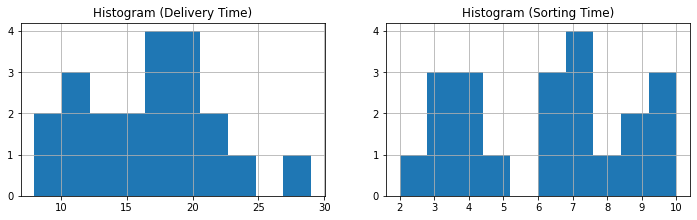

In [36]:
# histogram for visualize the data distribution
plt.figure(figsize=(12,7))
plt.subplot(2, 2, 1)
timeData['Delivery Time'].hist()
plt.title('Histogram (Delivery Time)')
plt.subplot(2, 2, 2)
timeData['Sorting Time'].hist()
plt.title('Histogram (Sorting Time)')
plt.show()

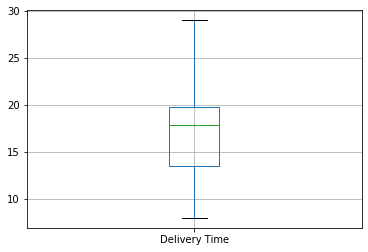

In [37]:
# check the outliers
timeData.boxplot(column=['Delivery Time'])

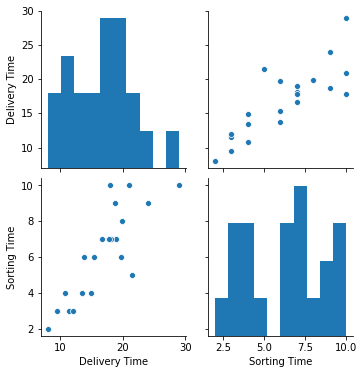

In [38]:
# check the pair-wise relationships
sns.pairplot(timeData)

Text(0.5, 1.0, 'Coorelation heatmap')

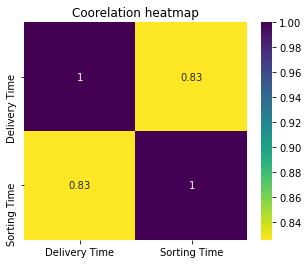

In [39]:
# coorelation matrix
plt.figure(figsize = (5,4))
sns.heatmap(timeData.corr(), annot = True, cmap = 'viridis_r')
plt.title('Coorelation heatmap')

In [40]:
# measure of coorelation
timeData.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


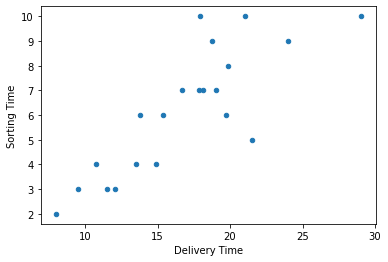

In [41]:
# scatter plot to bvisualize the relationship between the data
timeData.plot.scatter(x = 'Delivery Time', y = 'Sorting Time')

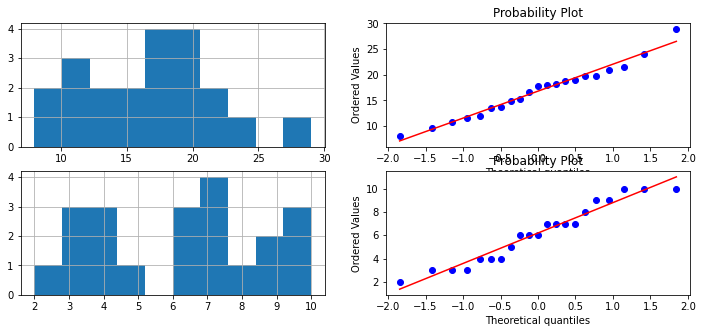

In [42]:
# data distribution and probability plot to check observed and expected values
plt.figure(figsize=(12,5))

plt.subplot(2, 2, 1)
timeData['Delivery Time'].hist()

plt.subplot(2, 2, 2)
stats.probplot(timeData['Delivery Time'], dist="norm", plot=plt)

plt.subplot(2, 2, 3)
timeData['Sorting Time'].hist()

plt.subplot(2, 2, 4)
stats.probplot(timeData['Sorting Time'], dist="norm", plot=plt)

plt.show()

In [43]:
# rename the dataframes for further analysis and operations
timeData1 = timeData.rename(columns={'Sorting Time': 'sortingTime', 'Delivery Time': 'deliveryTime'})
timeData1.head()

,deliveryTime,sortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


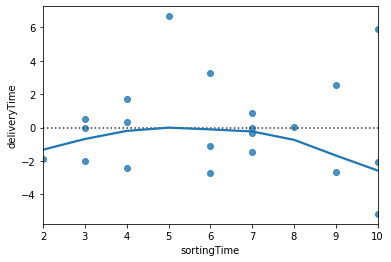

In [44]:
# to check the heteroscedasticity of residuals (fitted value against residuals)
sns.residplot(x = 'sortingTime', y = 'deliveryTime', data = timeData1, lowess = True)

## Build a model

In [45]:
# model1 and summary (Transformation: normal)
model1 = smf.ols("deliveryTime ~ sortingTime", data = timeData1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           3.98e-06
Time:                        22:28:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# model1 predicted data
predict1 = model1.predict(timeData1.sortingTime)
predict1.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [47]:
# calculate prediction error (RMSE)
rmseValue1 = rmse(predict1, timeData1.deliveryTime) 
print(rmseValue1)

2.7916503270617654


In [48]:
model1.params

Intercept      6.582734
sortingTime    1.649020
dtype: float64

In [49]:
# model2 and summary (Transformation: logarithamic)
model2=smf.ols("deliveryTime ~ np.log(sortingTime) + 1", data = timeData1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.64e-06
Time:                        22:28:44   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# model2 predicted data
predict2 = model2.predict(timeData1.sortingTime)
predict2.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

In [51]:
# RMSE (Root Mean Square Error)
rmseValue2 = rmse(predict2, timeData1.deliveryTime) 
print(rmseValue2)

2.733171476682066


In [52]:
model2.params

Intercept              1.159684
np.log(sortingTime)    9.043413
dtype: float64

In [53]:
# model3 and summary (Transformation: Square root)
def sRT(x):
    return x**(1/2)

model3 =smf.ols("deliveryTime ~ sRT(sortingTime) + 1", data = timeData1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliveryTime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.61e-06
Time:                        22:28:45   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.5188      2.995     -0.841      0.411      -8.788       3.751
sRT(sortingTime)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# model3 predicted values
predict3 = model3.predict(timeData1.sortingTime)
print('Predicted delivery time:\n')
predict3

Predicted delivery time:



0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [55]:
# RMSE error value
rmseValue3 = rmse(predict3, timeData1.deliveryTime) 
print(rmseValue3)

2.7315432100912105


## Model summary and selection

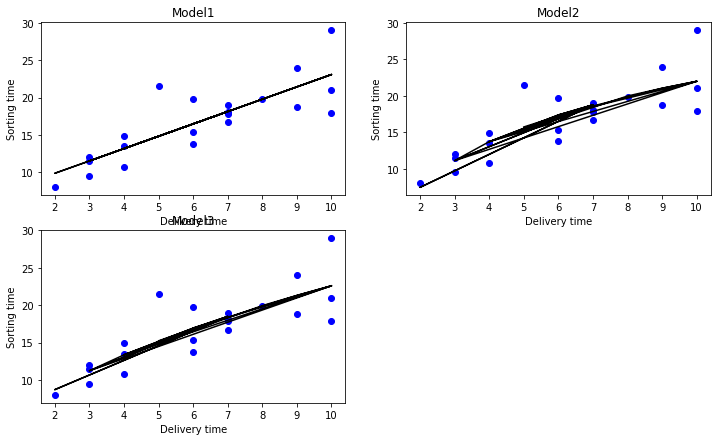

In [56]:
# Regression line is drawn using predicted values for different models
plt.figure(figsize=(12,7))

plt.subplot(2, 2, 1)
plt.scatter(x = timeData1.sortingTime, y = timeData1.deliveryTime, color='blue')
plt.plot(timeData1.sortingTime, predict1, color='black')
plt.xlabel("Delivery time")
plt.ylabel("Sorting time")
plt.title('Model1')

plt.subplot(2, 2, 2)
plt.scatter(x = timeData1.sortingTime, y = timeData1.deliveryTime, color='blue')
plt.plot(timeData1.sortingTime, predict2, color='black')
plt.xlabel("Delivery time")
plt.ylabel("Sorting time")
plt.title('Model2')

plt.subplot(2, 2, 3)
plt.scatter(x = timeData1.sortingTime, y = timeData1.deliveryTime, color='blue')
plt.plot(timeData1.sortingTime, predict3, color='black')
plt.xlabel("Delivery time")
plt.ylabel("Sorting time")
plt.title('Model3')

plt.show()

      [Models]   |    [R^2]    |  p-value  |    [RMSE]   |   [Transformation type]
    ----------------------------------------------------------------------------------
    1) model1     0.682         0.001       2.7916         withput transformation
    2) model2     0.695         0.642       2.7331         logarithamic transformation
    3) model3     0.696         0.411       2.7315         square root transformation

###### Best fit model is 'model3' with accuracy of 69.60% and error measures of 2.7315
* model accuracy: 69.60%
* error prediction: 2.7315

###### Predicted delivery time (based on model3)
* 22.578867
* 13.354345
* 16.921761
* 21.290936
* 22.578867